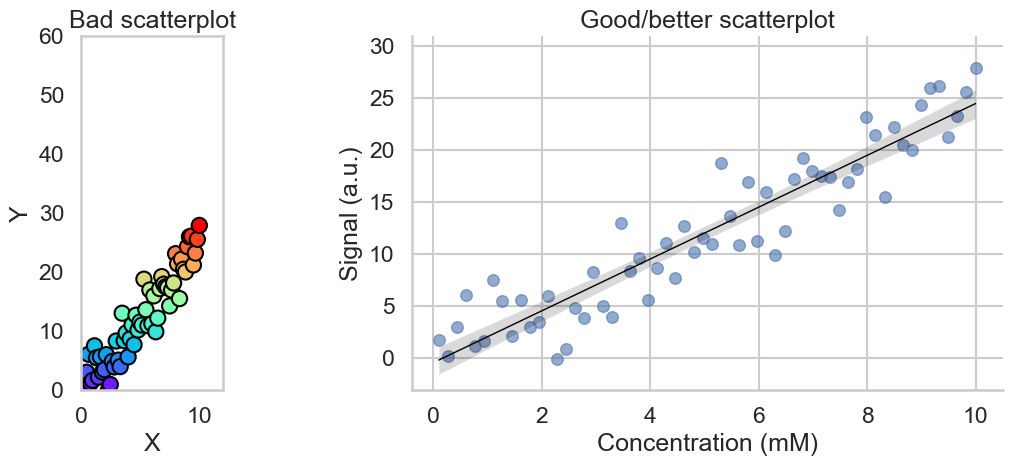

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Synthetic data: correlation between concentration and signal ---
np.random.seed(42)
n = 60
concentration = np.linspace(0.1, 10, n)
signal = 2.5 * concentration + np.random.normal(0, 3, n)

df = pd.DataFrame({"Concentration": concentration, "Signal": signal})

# --- Plot setup ---
sns.set_theme(style="whitegrid", context="talk")
figure, axes = plt.subplots(1, 2, figsize=(12, 5))

# ----------------------------------------------------------
# BAD SCATTERPLOT

axes[0].scatter(df["Concentration"], df["Signal"], c=df["Signal"],
                cmap="rainbow", s=120, edgecolor="black", alpha=1)
axes[0].set_title("Bad scatterplot")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# intentionally misleading axis limits
axes[0].set_xlim(0, 12)
axes[0].set_ylim(0, 60)
# unnecessary 3D feel via aspect ratio
axes[0].set_aspect(0.5)
axes[0].grid(False)

# ----------------------------------------------------------
# GOOD SCATTERPLOT

sns.regplot(data=df, x="Concentration", y="Signal",
            scatter_kws={"s":70, "alpha":0.6},
            line_kws={"color":"black", "lw":1},
            ax=axes[1])
axes[1].set_title("Good/better scatterplot")
axes[1].set_xlabel("Concentration (mM)")
axes[1].set_ylabel("Signal (a.u.)")
axes[1].set_xlim(df["Concentration"].min()-0.5, df["Concentration"].max()+0.5)
axes[1].set_ylim(df["Signal"].min()-3, df["Signal"].max()+3)
sns.despine(ax=axes[1])

# ----------------------------------------------------------
plt.tight_layout()
plt.show()
